# 가중치의 초기값

## (1) 은닉층의 활성화값 분포
### 가중치 감소란 가중치 매개변수의 값이 작아지도록 학습하는 방법이다. 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것이다. 그렇다고 가중치를 작게 만들기 위해 초기값을 0으로 하게 된다면, 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에, 제대로 학습이 이루어지지 않게 된다. 따라서 가중치의 초기값은 무작위로 설정해주는 것이 좋다.

### 1) 가중치를 작게하는 이유 : 큰 가중치 값이 많다는 것은 그만큼 변수 간 연결강도가 크다는 것이고, 그만큼 모델의 복잡도가 올라가게 된다는 것이다. 즉, 과대적합 가능성이 증가한다. 이때문에 가중치를 작게(가중치 감쇠, Weight Decay)를 한다.

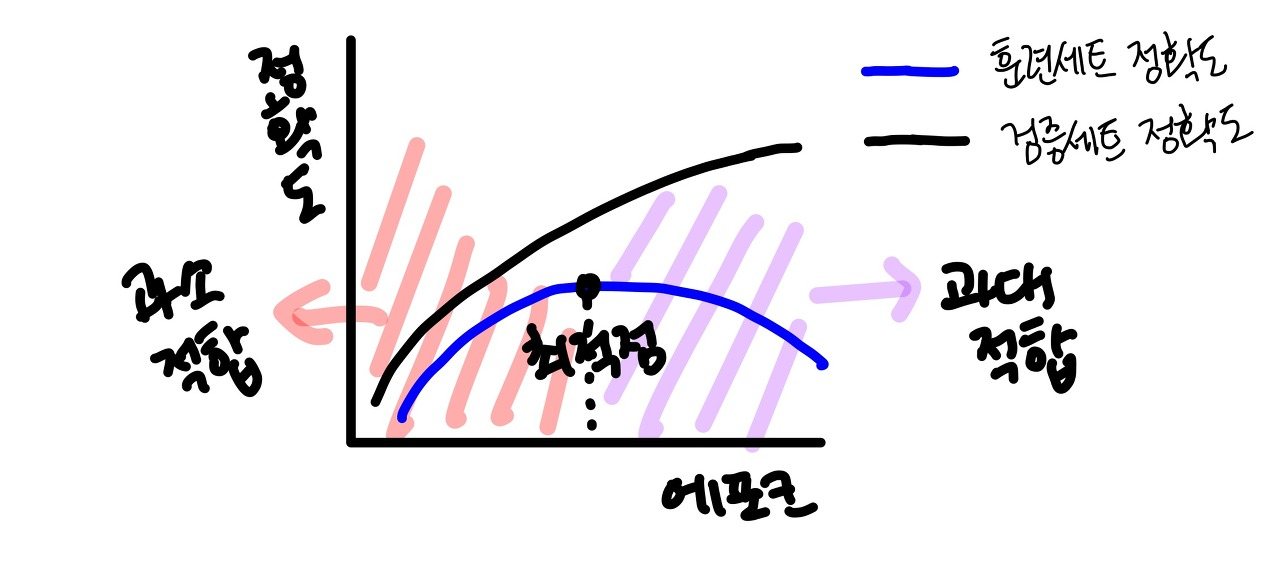
https://hyjykelly.tistory.com/50

### 2) 가중치의 값이 균일해서는 안되는 이유(분포가 고르게 퍼져있어야 하는 이유) : 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. 이렇게 되면 가중치를 여러개 갖는 의미가 없다. 따라서 무작위의 값으로 설정되야 한다.

# Sigmoid를  사용할때의 가중치 초기값

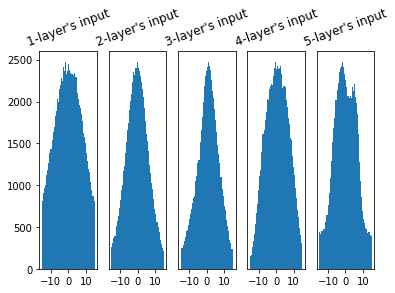

In [68]:
### Sigmoid 활용시, 가중치 초기값을 단순 랜덤 분포로 설정

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5
activations = {}
    
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) * 1  ### 초기 가중치 무작위 선정
    
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer's input",rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(np.dot(x, w).flatten(), bins = 50, range=(-15,15))
   
    
    a = np.dot(x, w)
    z = sigmoid(a)         ## Sigmoid 적용
    activations[i] = z
else:
     plt.show() 
    
# https://code4human.tistory.com/56?category=801571

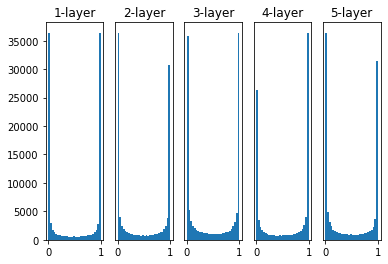

In [64]:
### Sigmoid 활용시, 
### 단숨 랜덤 분포로 시작한 가중치값들이 Layer가 깊어질수록 0과 1에 쏠려짐 확인됨
### 시그모이드 함수는 출력이 0과 1에 가까워지면 그 미분은 0에 다가간다. 기울기 소실 문제 발생


for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), bins = 30, range=(0,1))
plt.show()

# https://code4human.tistory.com/56?category=801571

### Sigmoid 특성상, 대부분의 x값에서 y값이 0과 1에 가깝게 출력된다. x값이 0 부근에서만 분포가 고루 퍼질수 있다.
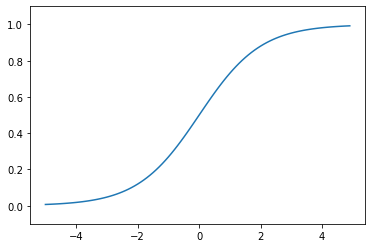

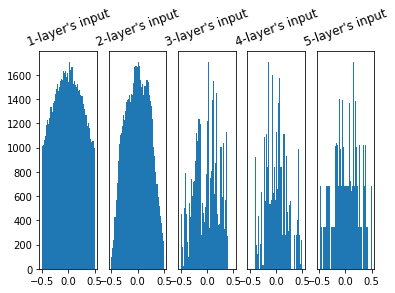

In [73]:
### sigmoid 활용시, 가중치 초기값에 표준편차를 설정 (0.05)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) * 0.05   ### 가중치의 편차가 0.05이 되도록 함
    
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer's input",rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(np.dot(x, w).flatten(), bins = 50, range=(-0.5,0.5))
   
    
    a = np.dot(x, w)
    z = sigmoid(a)         ## Sigmoid 적용
    activations[i] = z
else:
     plt.show()

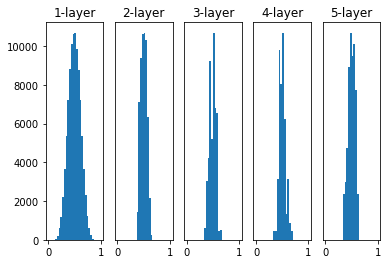

In [74]:
### Sigmoid 활용시, 
### 가중치 초기값에 표준편차를 설정 (0.05)하였더니,0과 1에 output 값이 쏠리는 현상 개선
### 그러나 활성화 함수 output값들이 Layer가 깊어질수록 중앙(0.5)에 쏠려짐 확인됨
### 기울기 소실 문제는 개선되었으나, 활성화 함수 output값들이 획일화되어감 (여러 가중치를 두는 의미가 사라짐)


for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), bins = 30, range=(0,1))
plt.show()



### -> 그래서, sigmoid에는 보통 Xavier 가중치 초기값을 적용한다. 

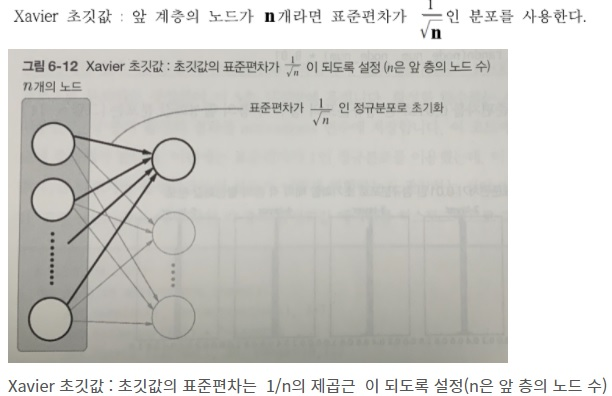

### <상세 식>  : 위 1/n 식은 입력과 출력의 연결 개수가 동일하므로 정의 가능
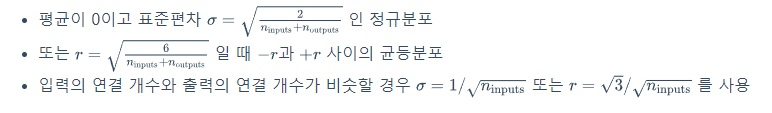
https://excelsior-cjh.tistory.com/177

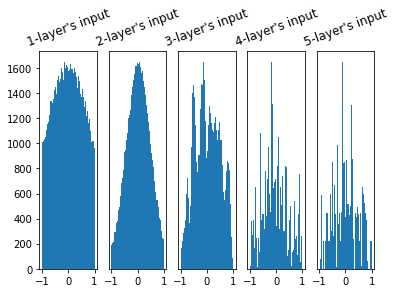

In [75]:
### sigmoid 활용시, 가중치 초기값에 Xavier 초기값(앞 계층 노드만큼의 표준편차로 나눔)을 설정 (0.05)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5
activations = {}
    
    
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)    ### 사비에르 편차 적용
    

    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer's input",rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(np.dot(x, w).flatten(), bins = 50, range=(-1,1))
   
    
    a = np.dot(x, w)
    z = sigmoid(a)         ## Sigmoid 적용
    activations[i] = z
else:
     plt.show()

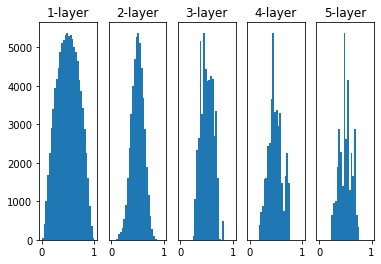

In [76]:
### Sigmoid 활용시, 
### 층이 깊어지면서 형태가 다소 일그러지지만 다른 방식보다는 훨씬 활성화 함수 출력 값이 넓게 분포된다.


for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), bins = 30, range=(0,1))
plt.show()


In [1]:
### Xavier 초기값을 적용해보기 

import numpy as np

b = np.random.normal(0, 100, size = (1,100))  
## 이전 Layer에서의 output 값(다음 Layer의 입력값). 100개의 노드가 있어, 분산이 100이 되어 있음

a = np.random.normal(0,0.01, size= (100,100))
## Xavier의 개념에 따라, 1/100의 분산을 갖는 가중치를 현재 Layer에 분포시킴

b.dot(a).var() ## 곱셈 실행

## 결과 : 분산이 그대로 100으로 유지됨 (물론 차이가 있음)

91.0017042343636

# ReLU를 사용할 때의 가중치 초기값

### Xavier 초기값은 활성화 함수가 선형인 것을 전제로 이끈 결과다.   sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다.  그래서 Xavier 초깃값이 적당하다.  반면 ReLU를 이용할 땐 ReLU에 특화된 초기값을 이용하라고 권장한다.  이 특화된 초기값을 찾아낸 카이밍 히(Kaiming He)의 이름을 따He 초기값이라 한다.(아래에서 자세한 설명)
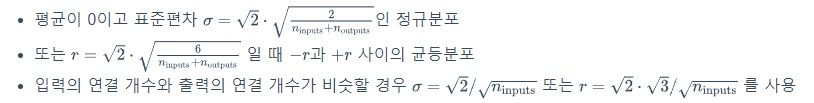

https://excelsior-cjh.tistory.com/177

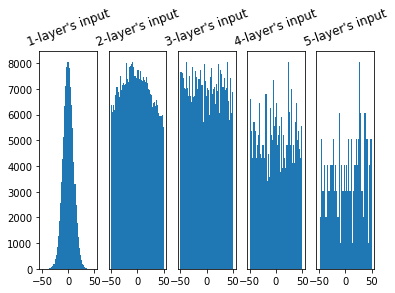

In [115]:
### ReLU 활용시, 가중치 초기값을 단숨 랜덤 분포로 설정 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)


x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5
activations = {}


for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num)    ### 가중치 초기값을 단숨 랜덤 분포로 설정 
    

    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer's input",rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(np.dot(x, w).flatten(), bins = 50, range=(-50,50))
   
    
    a = np.dot(x, w)
    z = ReLU(a)         ## ReLU 적용
    activations[i] = z
else:
     plt.show()

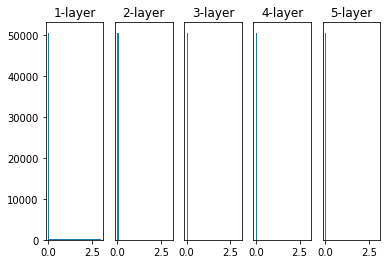

In [85]:
### ReLU 활용시, 
### 층이 깊어지면서 모든 활성화함수 출력 값이 0으로 쏠림 (뒤로 갈수록 기울기 소실됨, 0값이 늘어나거나 하지는 않음)

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), bins = 50, range=(0,3))
plt.show()


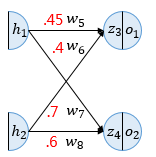
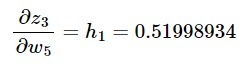

### 활성화 함수를 통과한 값(h1)이 작으면, 가중치 기울기 소실 문제 발생 가능 

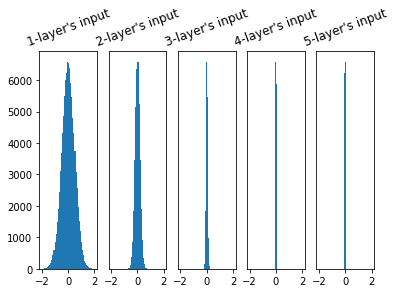

In [86]:
### ReLU 활용시, 가중치 초기값에 표준편차를 설정 (0.05)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)


x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) * 0.05  ### 가중치 초기값에 표준편차를 설정 (0.05)
    

    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer's input",rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(np.dot(x, w).flatten(), bins = 50, range=(-2,2))
   
    
    a = np.dot(x, w)
    z = ReLU(a)         ## ReLU 적용
    activations[i] = z
else:
     plt.show()

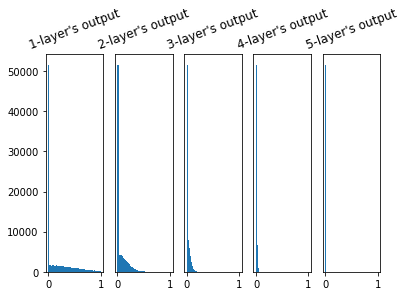

In [87]:
### ReLU 활용시, 
### 층이 깊어지면서 모든 활성화 함수 output 값이 0으로 쏠림 (뒤로 갈수록 기울기 소실됨, 0값이 늘어나거나 하지는 않음)


for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer's output", rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), bins = 50, range=(0,1))
plt.show()


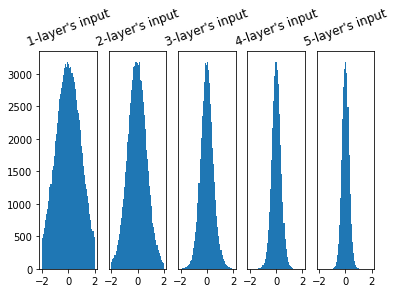

In [101]:
### ReLU 활용시, 가중치 초기값에 Xavier 초기값(앞 계층 노드만큼의 표준편차로 나눔)을 설정 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)


x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) * np.sqrt(1/node_num)  ### Xavier 적용
    

    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer's input",rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(np.dot(x, w).flatten(), bins = 50, range=(-2,2))
   
    
    a = np.dot(x, w)
    z = ReLU(a)         ## ReLU 적용
    activations[i] = z
else:
     plt.show()

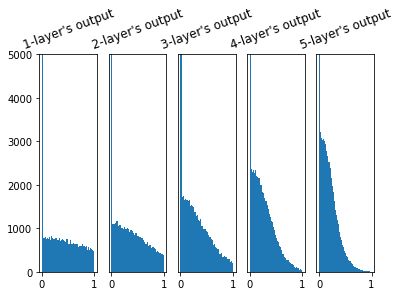

In [102]:
### ReLU 활용시,
### Xavier 초기값 적용시, 단순 표준편차보다는 조금 나아지긴 했지만
### 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실'을 일으킨다


for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer's output", rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), bins = 50, range=(0,1))
    plt.ylim([0, 5000])
plt.show()


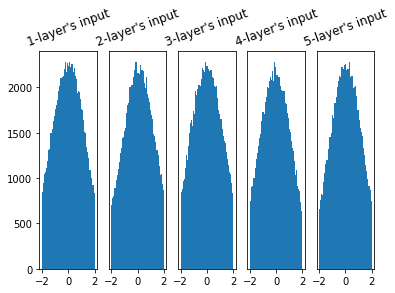

In [126]:
### ReLU 활용시, 가중치 초기값에 He 초기값 적용 (앞 계층 노드만큼의 표준편차 / 2 로 나눔)을 설정 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)


x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]      
    
    w = np.random.randn(node_num, node_num) * np.sqrt(2/node_num)  ### He 초기값 적용


    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer's input",rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(np.dot(x, w).flatten(), bins = 50, range=(-2,2))
   
    
    a = np.dot(x, w)
    z = ReLU(a)         ## ReLU 적용
    activations[i] = z
else:
     plt.show()

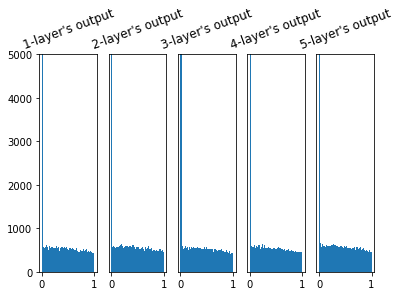

In [127]:
### ReLU 활용시,
### He 초기값 적용시, 단순 표준편차보다는 조금 나아지긴 했지만
### 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실'을 일으킨다


for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer's output", rotation =20)
    if i != 0: 
        plt.yticks([], [])
    plt.hist(a.flatten(), bins = 50, range=(0,1))
    plt.ylim([0, 5000])
plt.show()


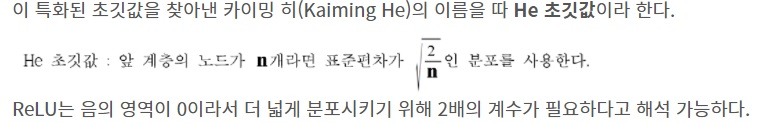

### 이해가 잘 안감

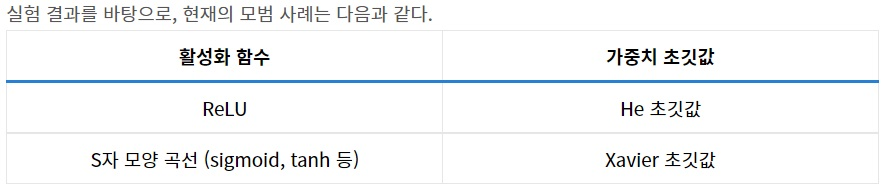

# 추가적인 이해

1. 일반적인 Random Initialization이 문제가 발생하는 이유
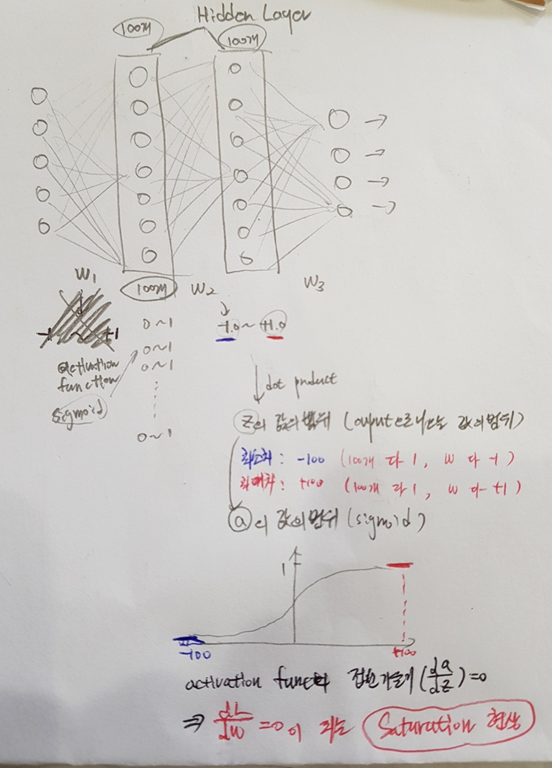

먼저 Hidden Layer가 2개이며, 각 neuron의 개수가 100개인 M.L.N.N. 모델에서, Sigmoid를 activation func으로 사용하고 있다고 가정해보자.

첫 Hidden Layer의 neuron값들은 sigmoid를 거쳐서 나온 0~1의 범위를 가지는 100개의 neuron일 것이다

두번째 weight를 -1 ~ 1 사이값으로 초기화 했다고 가정해보자.

두번째 Layer의 z 값의 범위는 최소값은 -100, 최대값은 100이다.(Full-connected Layer일 경우, 모든 w가 1 또는 -1일때)

sigmoid 함수 성질에 의해, 다음 Layer에 입력될 값이 커지며 saturaion 발생됨.

=> 즉 이 saturation을 피해야함 

=> Layer가 늘어나더라도, activation value가 saturation되지 않는 곳(sigmoid의 경우, 0.5)에서 평균과 표준편차가 일정하기를 원함.

=> '100'이라는 값이 exploding을 발생시키므로, 그만큼 나눠줌 (이를 통해 Layer를 늘리더라도 일정한 분산의 활성화 값을 유지할수 있음) 

즉, Weight 초기화시 z의 분산이 작아지도록 하기 위해, input neuron의 개수가 기준으로 사용됨

그러나, 이는 foward propagation에만 적용되는 사레로 실제로 back propagation까지 고려한다면
fan in / fan out 개념을 모두 고려해줘야한다.

-fan in : input layer의 뉴런 개수

-fan out : output layer의 뉴런 개수

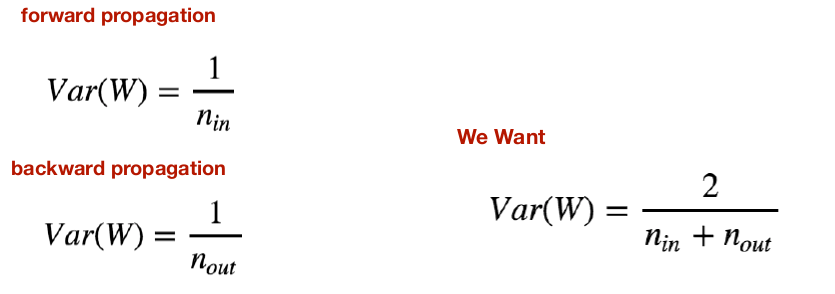




Xavier initialization은 크게 두가지 형태로 존재한다.

1. Gaussian form

[ 2/ fan in + fan out ] w의 variance & E(w) = 0 의 조건으로 가우시안 분산을 적용하여 초기값을 지정

2. Uniform form (균일 분포)

w의 범위의 min값, max값을 지정해줘서  균등한 랜덤분포로 초기화하는 방식
은 min(a) 와 max(b)값을 지정해주면, 그 사이에서 균등하게 랜덤분포를 뽑아내며, 
그 분산은 1/12 * (b-a)^12로 증명되어 있다.
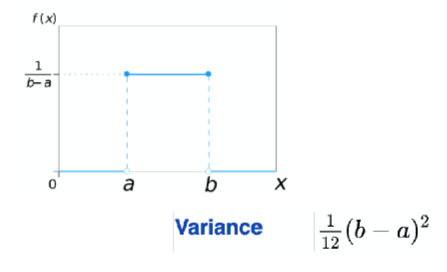

Uniform의 분산이 Gaussian의 분산과 동일하게 나오도록 하기 위한 범위(a,b)는 아래와 같이 확인할수 있다.
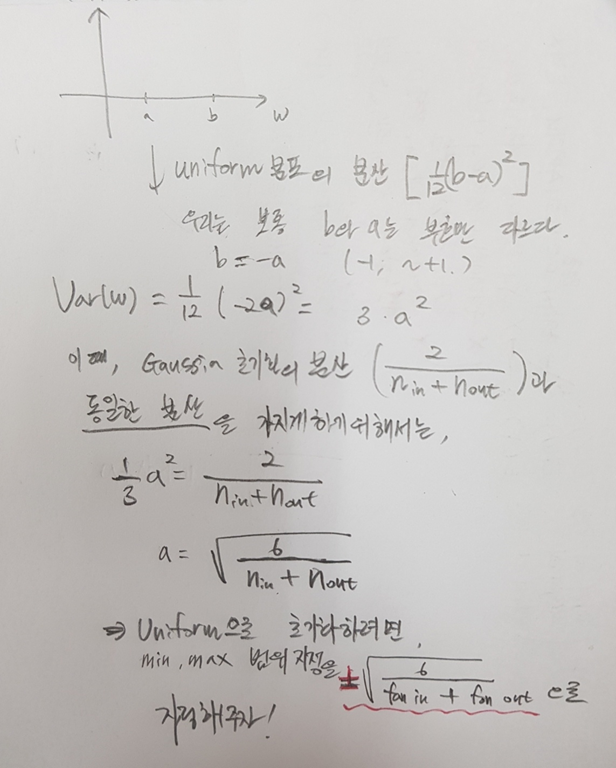

즉, Xavier 초기화의 형태는 아래와 같이 정리될수 있다.
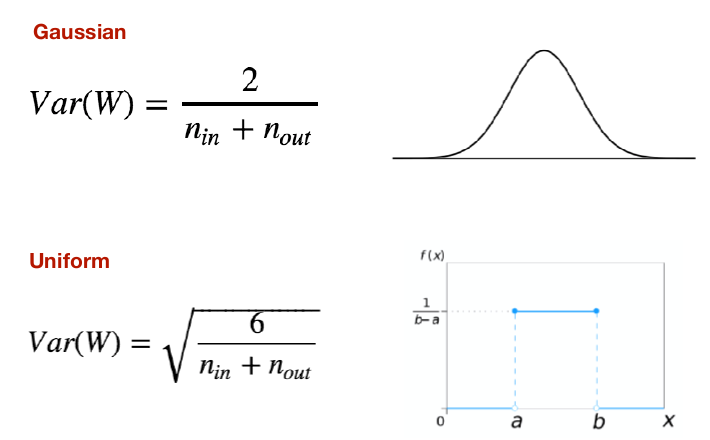

Xavier initialization의 증명

어떻게 입력 뉴런의 개수가 분산의 기준이 되는지를 확인해보자

무한히 많은 Layer가 있다고 할때, 그 중 중간의 Hidden Layer를 2개만 떼서 생각해보자
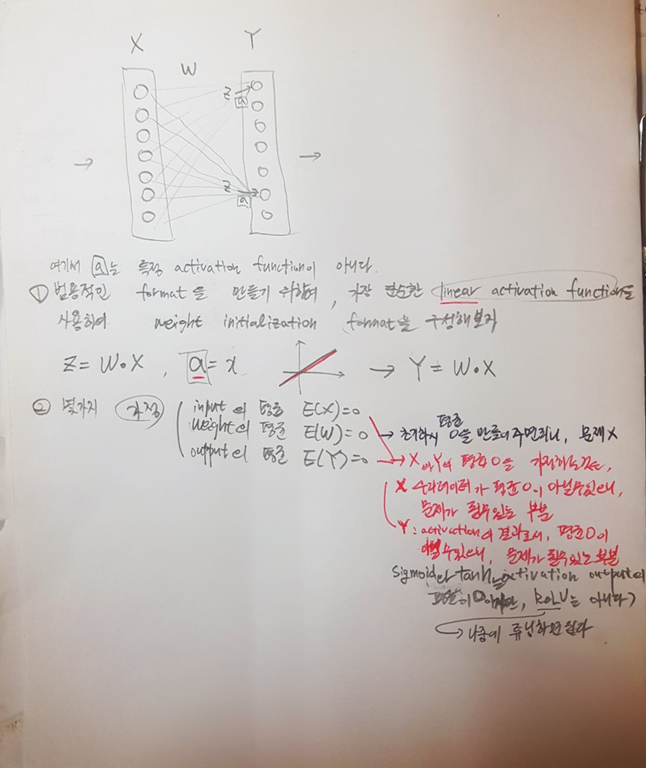

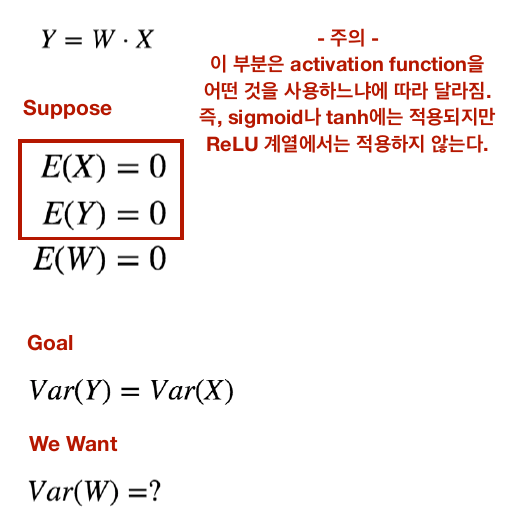

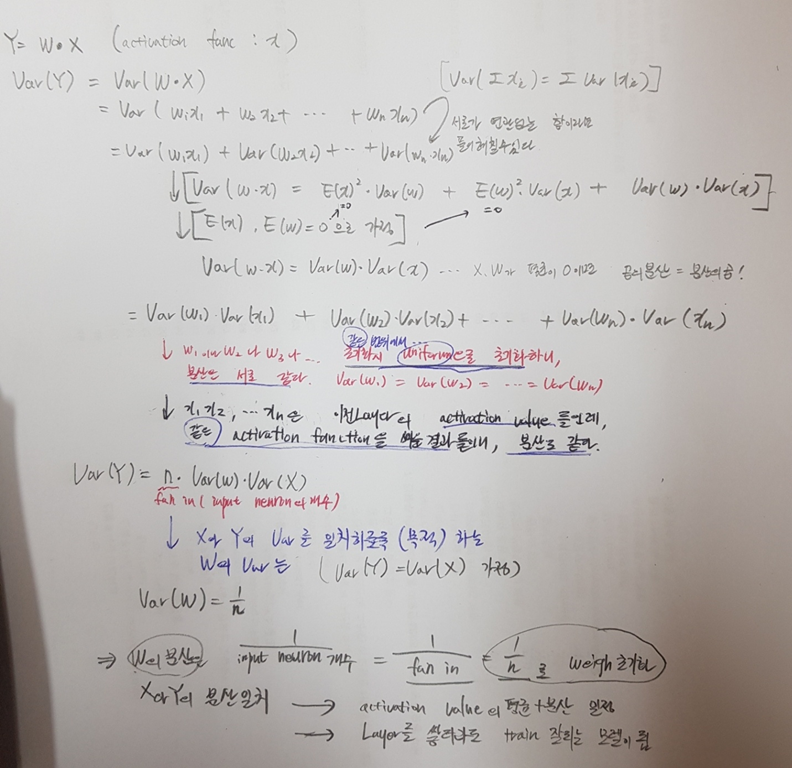